# Creating an AI app that detects diseases in plants using Facebook’s deep learning platform: PyTorch
![alt text](https://cdn-images-1.medium.com/max/1200/1*IbJF_6mRTMsG9gL0j8uz5Q.jpeg)

According to the Food and Agriculture organization of the United Nations (UN), transboundary plant pests and diseases affect food crops, causing significant losses to farmers and threatening food security.

Plant diseases contribute 10–16% losses in the global harvest of crops each year costing an estimated US$220 billion. According to a report of the Food and Agriculture Organization (FAO), our world population is anticipated to hit 9.1 billion in 2050. Therefore, agricultural production needs to be increased up to 70% to fulfill the food requirements of a steadily growing population. On the other hand, abundant use of chemicals such as bactericides, fungicides, and nematicides to control plant diseases has been causing adverse effects in the agro-ecosystem. Currently, there is a need for effective early disease detection techniques to control plant diseases for food security and sustainability of agro-ecosystem.

The spread of transboundary plant pests and diseases has increased dramatically in recent years. Globalization, trade and climate change, as well as reduced resilience in production systems due to decades of agricultural intensification, have all played a part.

Transboundary plant pests and diseases can easily spread to several countries and reach epidemic proportions. Outbreaks and upsurges can cause huge losses to crops and pastures, threatening the livelihoods of vulnerable farmers and the food and nutrition security of millions at a time.

If you are into data science or machine learning, you’ve probably heard about these platforms crowdsourcing data challenges. The first that comes to my mind is Kaggle. Kaggle is this crowd-sourced platform that attracts, nurtures, trains and challenges data scientists from all around the world to solve data science, machine learning, and predictive analytics problems. This platform enables data scientists and other developers to engage in running machine learning contests, write and share code, and to host datasets.

Looking for project ideas and datasets, found out another platform similar to Kaggle, but as a non-profit, I’m talking about crowdAI. crowdAI also hosts open data science challenges and helps universities, government agencies, NGOs, or businesses to run and manage their data challenges. The crowdAI platform is an open source infrastructure that can immediately reach thousands of data scientists around the world to work on interesting data problems.

I wanted to mention crowdAI, because it was there where I found the “PlantVillage Disease Classification Challenge”. The goal of this competition was to develop algorithms than can accurately diagnose a disease based on an image.

This challenge has already ended but I wanted to approach the same goal, using a different Deep Learning framework: PyTorch. So, I developed an AI application using a deep learning model and the transfer learning technique.

Computer Vision is a field within deep learning that is growing up more everyday . There are many areas Computer Vision can help to. 

In this notebook I will implement a deep learning model that can identify plant diseases, using Pytorch framework,  a Convolutional Neural Network (CNN) architecture.

I'll train this image classifier to recognize the different plant diseases given an image.This can be implemented in a phone app that tells you the type of disease your camera is looking at. I will use the "Plant Village" dataset.


The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

# "Plant-Village"  dataset


The Plant Village dataset contains 38 different plant disease classes and one background class from Stanford's open dataset of background images.
The classes are:

- Apple___Apple_scab
- Apple___Black_rot
- Apple___Cedar_apple_rust
- Apple___healthy
- Blueberry___healthy
- Cherry_(including_sour)___Powdery_mildew
- Cherry_(including_sour)___healthy
- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
- Corn_(maize)___Common_rust_
- Corn_(maize)___Northern_Leaf_Blight
- Corn_(maize)___healthy
- Grape___Black_rot
- Grape___Esca_(Black_Measles)
- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
- Grape___healthy
- Orange___Haunglongbing_(Citrus_greening)
- Peach___Bacterial_spot
- Peach___healthy
- Pepper,_bell___Bacterial_spot
- Pepper,_bell___healthy
- Potato___Early_blight
- Potato___Late_blight
- Potato___healthy
- Raspberry___healthy
- Soybean___healthy
- Squash___Powdery_mildew
- Strawberry___Leaf_scorch
- Strawberry___healthy
- Tomato___Bacterial_spot
- Tomato___Early_blight
- Tomato___Late_blight
- Tomato___Leaf_Mold
- Tomato___Septoria_leaf_spot
- Tomato___Spider_mites Two-spotted_spider_mite
- Tomato___Target_Spot
- Tomato___Tomato_Yellow_Leaf_Curl_Virus
- Tomato___Tomato_mosaic_virus
- Tomato___healthy

# Importing the libraries
First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here. The notebook was made on Google Colab.

In [0]:
# We need pillow version of 5.3.0
# We will uninstall the older version first
!pip uninstall -y Pillow
# Install the new one
!pip install Pillow==5.3.0
# Let's verify the version
# This should print 5.3.0. If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime
!pip install image
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
import PIL
print(PIL.PILLOW_VERSION)

Skipping Pillow as it is not installed.
    100% |████████████████████████████████| 2.0MB 15.1MB/s 
  [PIL]
You must restart the runtime in order to use newly installed versions.
    100% |████████████████████████████████| 484.0MB 52.4MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5c1f6000 @  0x7f2fd473f2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.9MB/s 
4.0.0


In [0]:
# We will verify that GPU is enabled for this notebook
# Following should print: CUDA is available!  Training on GPU ...
# if it prints otherwise, then you need to enable GPU: 
# From Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision
from collections import OrderedDict
from torch.autograd import Variable
from PIL import Image
from torch.optim import lr_scheduler
import copy
import json
import os
from os.path import exists
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

CUDA is available!  Training on GPU ...
cuda:0


# Load the data

Here you'll use 'torchvision'  to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). The dataset is split into two parts, training and validation. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. If you use a pre-trained network, you'll also need to make sure the input data is resized to 224x224 pixels as required by the networks.

The validation set is used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks available from 'torchvision' were trained on the ImageNet dataset where each color channel was normalized separately. For both sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's ' [0.485, 0.456, 0.406]'  and for the standard deviations ''[0.229, 0.224, 0.225]' , calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.

In [0]:
# Download the dataset and unzip de folder
!gdown https://drive.google.com/uc?id=1Bhh3VeMBH6F7vKqHdDDmdyi-7RfvQNqJ
!tar -xvf PlantVillage.tar.gz

In [0]:
#Organizing the dataset
data_dir = './PlantVillage'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
nThreads = 4
batch_size = 32
use_gpu = torch.cuda.is_available()

# Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the plant diseases.

In [0]:
!wget https://raw.githubusercontent.com/viritaromero/Plant-diseases-classifier/master/categories.json

--2019-01-24 12:00:08--  https://raw.githubusercontent.com/viritaromero/Plant-diseases-classifier/master/categories.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2196 (2.1K) [text/plain]
Saving to: ‘categories.json’

categories.json     100%[===================>]   2.14K  --.-KB/s    in 0s      

2019-01-24 12:00:08 (52.2 MB/s) - ‘categories.json’ saved [2196/2196]



In [0]:
import json

with open('categories.json', 'r') as f:
    cat_to_name = json.load(f)
    
cat_to_name
    

{'Apple___Apple_scab': 'Apple___Apple_scab',
 'Apple___Black_rot': 'Apple___Black_rot',
 'Apple___Cedar_apple_rust': 'Apple___Cedar_apple_rust',
 'Apple___healthy': 'Apple___healthy',
 'Blueberry___healthy': 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew': 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy': 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_': 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight': 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy': 'Corn_(maize)___healthy',
 'Grape___Black_rot': 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)': 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy': 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)': 'Orange___Haungl

In [0]:
# Define your transforms for the training and validation sets
# Data augmentation and normalization for training
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the datasets with ImageFolder

data_dir = 'PlantVillage'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

# Using the image datasets and the trainforms, define the dataloaders
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features. Resnet-152 pretrained model is used for this image classifier.

In [0]:
# Build and train your network

# 1. Load resnet-152 pre-trained network
model = models.resnet152(pretrained=True)
# Freeze parameters so we don't backprop through them

for param in model.parameters():
    param.requires_grad = False

#Let's check the model architecture:
    print(model)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:02<00:00, 100386247.09it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# 2. Define a new, untrained feed-forward network as a classifier, using ReLU activations

# Our input_size matches the in_features of pretrained model


from collections import OrderedDict


# Creating the classifier ordered dictionary first

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 512)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(512, 39)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

# Replacing the pretrained model classifier with our classifier
model.fc = classifier

In [0]:
#Function to train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best valid accuracy: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
# Train a model with a pre-trained network
num_epochs = 10
if use_gpu:
    print ("Using GPU: "+ str(use_gpu))
    model = model.cuda()

# NLLLoss because our output is LogSoftmax
criterion = nn.NLLLoss()

# Adam optimizer with a learning rate
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=10)

Using GPU: True
Epoch 1/10
----------
train Loss: 0.7436 Acc: 0.7835
val Loss: 0.2478 Acc: 0.9188

Epoch 2/10
----------
train Loss: 0.4520 Acc: 0.8573
val Loss: 0.2146 Acc: 0.9300

Epoch 3/10
----------
train Loss: 0.4061 Acc: 0.8713
val Loss: 0.2631 Acc: 0.9172

Epoch 4/10
----------
train Loss: 0.3738 Acc: 0.8821
val Loss: 0.3244 Acc: 0.8983

Epoch 5/10
----------
train Loss: 0.3629 Acc: 0.8844
val Loss: 0.1677 Acc: 0.9431

Epoch 6/10
----------
train Loss: 0.2478 Acc: 0.9200
val Loss: 0.1361 Acc: 0.9540

Epoch 7/10
----------
train Loss: 0.2319 Acc: 0.9258
val Loss: 0.1282 Acc: 0.9568

Epoch 8/10
----------
train Loss: 0.2296 Acc: 0.9263
val Loss: 0.1224 Acc: 0.9584

Epoch 9/10
----------
train Loss: 0.2183 Acc: 0.9295
val Loss: 0.1135 Acc: 0.9616

Epoch 10/10
----------
train Loss: 0.2137 Acc: 0.9299
val Loss: 0.1080 Acc: 0.9642

Training complete in 174m 13s
Best valid accuracy: 0.964195


In [0]:
# Do validation on the test set
def test(model, dataloaders, device):
  model.eval()
  accuracy = 0
  
  model.to(device)
    
  for images, labels in dataloaders['val']:
    images = Variable(images)
    labels = Variable(labels)
    images, labels = images.to(device), labels.to(device)
      
    output = model.forward(images)
    ps = torch.exp(output)
    equality = (labels.data == ps.max(1)[1])
    accuracy += equality.type_as(torch.FloatTensor()).mean()
      
    print("Testing Accuracy: {:.3f}".format(accuracy/len(dataloaders['val'])))



In [0]:
test(model, dataloaders, device)

Testing Accuracy: 0.003
Testing Accuracy: 0.006
Testing Accuracy: 0.009
Testing Accuracy: 0.012
Testing Accuracy: 0.014
Testing Accuracy: 0.017
Testing Accuracy: 0.020
Testing Accuracy: 0.023
Testing Accuracy: 0.026
Testing Accuracy: 0.028
Testing Accuracy: 0.031
Testing Accuracy: 0.034
Testing Accuracy: 0.037
Testing Accuracy: 0.039
Testing Accuracy: 0.042
Testing Accuracy: 0.045
Testing Accuracy: 0.048
Testing Accuracy: 0.050
Testing Accuracy: 0.053
Testing Accuracy: 0.056
Testing Accuracy: 0.058
Testing Accuracy: 0.061
Testing Accuracy: 0.064
Testing Accuracy: 0.067
Testing Accuracy: 0.070
Testing Accuracy: 0.072
Testing Accuracy: 0.075
Testing Accuracy: 0.078
Testing Accuracy: 0.081
Testing Accuracy: 0.084
Testing Accuracy: 0.087
Testing Accuracy: 0.089
Testing Accuracy: 0.092
Testing Accuracy: 0.095
Testing Accuracy: 0.098
Testing Accuracy: 0.100
Testing Accuracy: 0.103
Testing Accuracy: 0.106
Testing Accuracy: 0.109
Testing Accuracy: 0.112
Testing Accuracy: 0.115
Testing Accuracy

# Save the checkpoint

Now that the network is trained,  we will save the model so we can load it later for making predictions. We will save the mapping of classes to indices which we get from one of the image datasets: `image_datasets['train'].class_to_idx`. We will attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that we'll want to completely rebuild the model later so we can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [0]:
# Save the checkpoint 

model.class_to_idx = dataloaders['train'].dataset.class_to_idx
model.epochs = num_epochs
checkpoint = {'input_size': [3, 224, 224],
                 'batch_size': dataloaders['train'].batch_size,
                  'output_size': 39,
                  'state_dict': model.state_dict(),
                  'data_transforms': data_transforms,
                  'optimizer_dict':optimizer.state_dict(),
                  'class_to_idx': model.class_to_idx,
                  'epoch': model.epochs}
torch.save(checkpoint, 'gdrive/My Drive/plants9615_checkpoint.pth')

# Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [0]:
# Write a function that loads a checkpoint and rebuilds the model

def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = models.resnet152()
    
    # Our input_size matches the in_features of pretrained model
    input_size = 2048
    output_size = 39
    
    classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 512)),
                          ('relu', nn.ReLU()),
                          #('dropout1', nn.Dropout(p=0.2)),
                          ('fc2', nn.Linear(512, 39)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

# Replacing the pretrained model classifier with our classifier
    model.fc = classifier
    
    
    model.load_state_dict(checkpoint['state_dict'])
    
    return model, checkpoint['class_to_idx']

# Get index to class mapping
loaded_model, class_to_idx = load_checkpoint('gdrive/My Drive/plants9615_checkpoint.pth')
idx_to_class = { v : k for k,v in class_to_idx.items()}

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the plant disease in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 


In [0]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model

    size = 256, 256
    image.thumbnail(size, Image.ANTIALIAS)
    image = image.crop((128 - 112, 128 - 112, 128 + 112, 128 + 112))
    npImage = np.array(image)
    npImage = npImage/255.
        
    imgA = npImage[:,:,0]
    imgB = npImage[:,:,1]
    imgC = npImage[:,:,2]
    
    imgA = (imgA - 0.485)/(0.229) 
    imgB = (imgB - 0.456)/(0.224)
    imgC = (imgC - 0.406)/(0.225)
        
    npImage[:,:,0] = imgA
    npImage[:,:,1] = imgB
    npImage[:,:,2] = imgC
    
    npImage = np.transpose(npImage, (2,0,1))
    
    return npImage

In [0]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

# Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']

In [0]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # Implement the code to predict the class from an image file
    
    image = torch.FloatTensor([process_image(Image.open(image_path))])
    model.eval()
    output = model.forward(Variable(image))
    pobabilities = torch.exp(output).data.numpy()[0]
    

    top_idx = np.argsort(pobabilities)[-topk:][::-1] 
    top_class = [idx_to_class[x] for x in top_idx]
    top_probability = pobabilities[top_idx]

    return top_probability, top_class

In [0]:
print (predict('PlantVillage/val/Blueberry___healthy/06eacfab-fb39-40e0-bbce-927bc98fa2ac___RS_HL 2663.JPG', loaded_model))

(array([9.99913573e-01, 5.61676025e-05, 1.07559135e-05, 7.65276036e-06,
       6.95441440e-06], dtype=float32), ['Blueberry___healthy', 'Apple___healthy', 'Peach___Bacterial_spot', 'Strawberry___healthy', 'Pepper,_bell___healthy'])


# Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the validation accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

You can convert from the class integer encoding to actual plant diseases names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [0]:
# Display an image along with the top 5 classes
def view_classify(img, probabilities, classes, mapper):
    ''' Function for viewing an image and it's predicted classes.
    '''
    img_filename = img.split('/')[-2]
    img = Image.open(img)

    fig, (ax1, ax2) = plt.subplots(figsize=(6,10), ncols=1, nrows=2)
    flower_name = mapper[img_filename]
    
    ax1.set_title(flower_name)
    ax1.imshow(img)
    ax1.axis('off')
    
    y_pos = np.arange(len(probabilities))
    ax2.barh(y_pos, probabilities)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([mapper[x] for x in classes])
    ax2.invert_yaxis()

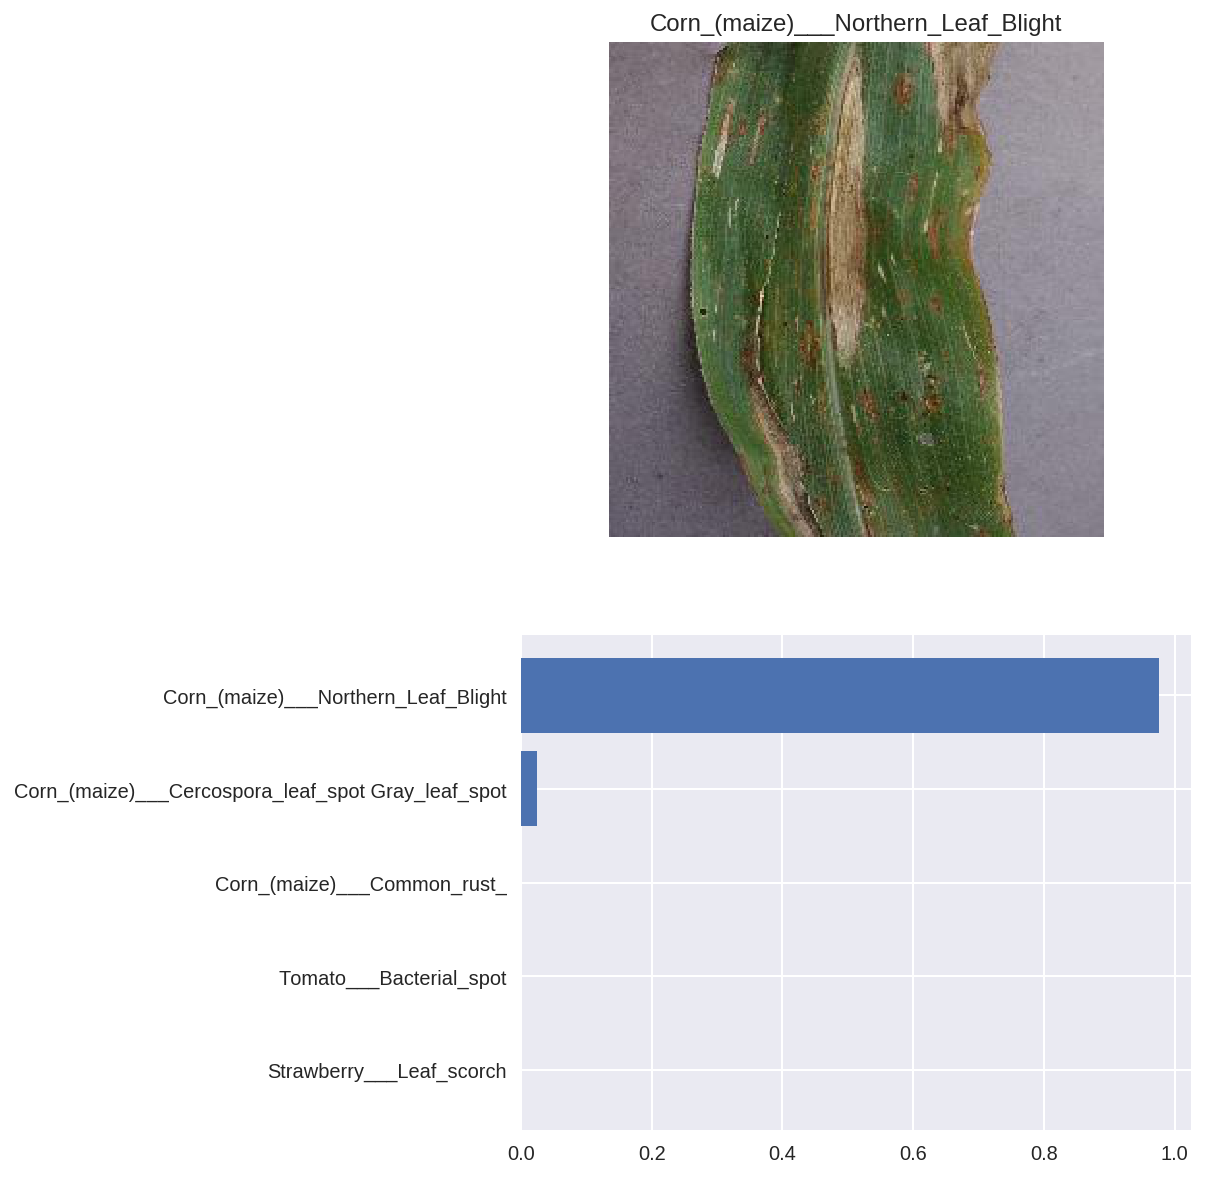

In [0]:
#img = 'PlantVillage/val/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG'
#img = 'PlantVillage/val/Tomato___Bacterial_spot/00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG'
img = 'PlantVillage/val/Corn_(maize)___Northern_Leaf_Blight/00a14441-7a62-4034-bc40-b196aeab2785___RS_NLB 3932.JPG'
#img = 'PlantVillage/val/Apple___healthy/3af9dc00-a64b-4b45-a034-1d190e5277ea___RS_HL 7788.JPG'
#img = 'PlantVillage/val/Potato___Late_blight/0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG'
#img = 'PlantVillage/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/0e1fda76-d958-490f-9fcb-21e86c99dbe6___UF.GRC_YLCV_Lab 02200.JPG'

p, c = predict(img, loaded_model)
view_classify(img, p, c, cat_to_name)